# Curve fitting of COVID-19 cases of India

Created by (c) Shardav Bhatt


# 1. Introduction

Jupyter Notebook Created by Shardav Bhatt

Data reference: https://www.mohfw.gov.in/

In this notebook, I have considered data of COVID-19 cases in India to perform curve fitting on it. The graphs given data and fitted data are shown. Separate graphs of number of cases, number of deaths and number of recovered are shown for cummulative data as well as daily data. The curve fitting is in terms of polynomial fitting based on method of least square.

# 2. Importing necessary modules

In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# 3. Extracting data from file

In [199]:
data = pd.read_csv('data.csv')
d = data.values
dates = d[:,0]
days = np.array(d[:,1],dtype='int16')
cummulative_cases = np.array(d[:,2], dtype='float64')
cummulative_deaths = np.array(d[:,3], dtype='float64')
cummulative_recovered = np.array(d[:,4], dtype='float64')

# 4. Generating daily data from the cummulative data

In [200]:
def daily_data (y):
  daily = [None]*len(y)
  daily[0] = y[0]
  for i in range(1,len(y)):
    daily[i] = y[i]-y[i-1]
  return np.array(daily)

daily_new_cases = daily_data(cummulative_cases)
daily_new_deaths = daily_data(cummulative_deaths)
daily_new_recovered = daily_data(cummulative_recovered)

# 5. Determining proportion of deaths and recovered cases

In [201]:
def proportion (x,y):
  prop = [None]*len(y)
  for i in range(len(y)):
    prop[i] = (y[i]/x[i])*100
  return np.array(prop)

prop_death = proportion (cummulative_cases, cummulative_deaths)
prop_recovered = proportion (cummulative_cases, cummulative_recovered)

# 6. Funtion to check best degreee of polynomial
Here I am trying different degrees of polynomial and checking accuracy of it using Mean Squared Error and $R^2$ score. I am trying polynomials upto degree 100 to check which degree is best.

In [202]:
def fit (x,y):
  for i in range (0,101,5):
    f = np.polyfit(x,y,deg=i)
    fval = np.polyval(f,x)
    print('Degree = %d \tMSE = %10.2f \t R^2 Score = %10.6f' %(i,mean_squared_error(y,fval),r2_score(y,fval)))

# 7. Function to plot data and fitted data

This function plots the given data and the fitted data. Given data is considered from the uploaded data file. Fitted data is generated using $n$ degree polynomial.

In [203]:
def my_plot(x,y,dates,n):
  f = np.polyfit(x,y,deg=n)
  fval = np.polyval(f,x)

  date_list = []
  pos = []
  for i in range(len(dates)):
    if i%5 == 0:
        date_list.append(str(dates[i]).split()[0])
        pos.append(i)

  plt.plot(y,'ro',markersize=2)
  plt.plot(fval,'g',linewidth=1)
  plt.xticks(ticks=pos, rotation='vertical',labels=date_list)
  plt.grid(which = 'both',axis='both')
  plt.text(days[-1],y[-1],str(int(y[-1])))
  plt.ylabel('Number of Cases')
  plt.legend(['Actual Data (https://www.mohfw.gov.in/)','Fitted curve'])
  if n == 1:
    print('\nFitted curve for degree %d is Y = %fx + %f\n' %(n,f[0],f[1]))
  elif n == 2:
    print('\nFitted curve for degree %d is Y = %fx^2 + %fx + %f\n' %(n,f[0],f[1],f[2]))
  elif n == 3:
    print('\nFitted curve for degree %d is Y = %fx^3 + %fx^2 + %fx + %f\n' %(n,f[0],f[1],f[2],f[3]))
  elif n == 4:
    print('\nFitted curve for degree %d is Y = %fx^4 + %fx^3 + %fx^2 + %fx + %f\n' %(n,f[0],f[1],f[2],f[3],f[4]))
  elif n == 5:
    print('\nFitted curve for degree %d is Y = %fx^5 + %fx^4 + %fx^3 + %fx^2 + %fx + %f\n' %(n,f[0],f[1],f[2],f[3],f[4],f[5]))
  else:
    pass

# 8. Analysis of Cummulative Cases
It can be observed that after first week of april, the rate of increament of the cases shoot up.

Degree = 0 	MSE = 374131007.66 	 R^2 Score =   0.000000
Degree = 5 	MSE =  148646.98 	 R^2 Score =   0.999603
Degree = 10 	MSE =   33452.73 	 R^2 Score =   0.999911
Degree = 15 	MSE =   21741.71 	 R^2 Score =   0.999942
Degree = 20 	MSE =   12886.76 	 R^2 Score =   0.999966
Degree = 25 	MSE =   12607.42 	 R^2 Score =   0.999966
Degree = 30 	MSE =   11782.91 	 R^2 Score =   0.999969
Degree = 35 	MSE =   11187.98 	 R^2 Score =   0.999970
Degree = 40 	MSE =   10502.08 	 R^2 Score =   0.999972
Degree = 45 	MSE =   10427.61 	 R^2 Score =   0.999972
Degree = 50 	MSE =   10056.03 	 R^2 Score =   0.999973
Degree = 55 	MSE =   10136.55 	 R^2 Score =   0.999973
Degree = 60 	MSE =   10064.17 	 R^2 Score =   0.999973
Degree = 65 	MSE =   10082.90 	 R^2 Score =   0.999973
Degree = 70 	MSE =    8988.53 	 R^2 Score =   0.999976
Degree = 75 	MSE =    9303.11 	 R^2 Score =   0.999975
Degree = 80 	MSE =    9573.07 	 R^2 Score =   0.999974
Degree = 85 	MSE =    8038.22 	 R^2 Score =   0.999979
Degree = 9

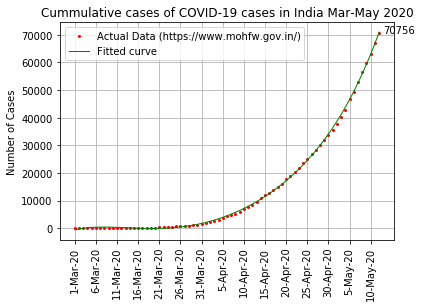

In [204]:
fit (days, cummulative_cases)
my_plot(days, cummulative_cases, dates, 5)
plt.title('Cummulative cases of COVID-19 cases in India Mar-May 2020')
plt.show()

# 9. Analysis of Cummulative deaths

Degree = 0 	MSE =  409850.04 	 R^2 Score =   0.000000
Degree = 5 	MSE =     552.12 	 R^2 Score =   0.998653
Degree = 10 	MSE =     113.56 	 R^2 Score =   0.999723
Degree = 15 	MSE =      96.21 	 R^2 Score =   0.999765
Degree = 20 	MSE =      66.17 	 R^2 Score =   0.999839
Degree = 25 	MSE =      64.53 	 R^2 Score =   0.999843
Degree = 30 	MSE =      39.07 	 R^2 Score =   0.999905
Degree = 35 	MSE =      38.00 	 R^2 Score =   0.999907
Degree = 40 	MSE =      34.20 	 R^2 Score =   0.999917
Degree = 45 	MSE =      31.55 	 R^2 Score =   0.999923
Degree = 50 	MSE =      31.52 	 R^2 Score =   0.999923
Degree = 55 	MSE =      31.38 	 R^2 Score =   0.999923
Degree = 60 	MSE =      28.67 	 R^2 Score =   0.999930
Degree = 65 	MSE =      25.16 	 R^2 Score =   0.999939
Degree = 70 	MSE =      17.48 	 R^2 Score =   0.999957
Degree = 75 	MSE =      17.25 	 R^2 Score =   0.999958
Degree = 80 	MSE =      17.79 	 R^2 Score =   0.999957
Degree = 85 	MSE =      16.96 	 R^2 Score =   0.999959
Degree = 90 

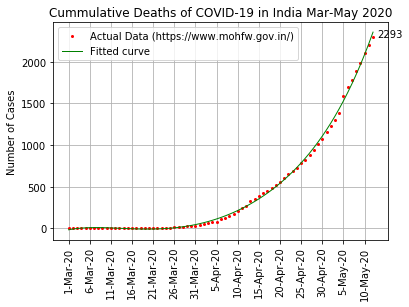

In [205]:
fit (days, cummulative_deaths)
my_plot(days, cummulative_deaths, dates, 5)
plt.title('Cummulative Deaths of COVID-19 in India Mar-May 2020')
plt.show()

# 10. Analysis of Cummulative Recovered cases

Degree = 0 	MSE = 33226756.30 	 R^2 Score =   0.000000
Degree = 5 	MSE =    9625.42 	 R^2 Score =   0.999710
Degree = 10 	MSE =    4601.03 	 R^2 Score =   0.999862
Degree = 15 	MSE =    3084.42 	 R^2 Score =   0.999907
Degree = 20 	MSE =    2584.61 	 R^2 Score =   0.999922
Degree = 25 	MSE =    2576.14 	 R^2 Score =   0.999922
Degree = 30 	MSE =    2204.70 	 R^2 Score =   0.999934
Degree = 35 	MSE =    2076.63 	 R^2 Score =   0.999938
Degree = 40 	MSE =    1867.83 	 R^2 Score =   0.999944
Degree = 45 	MSE =    1849.44 	 R^2 Score =   0.999944
Degree = 50 	MSE =    1680.49 	 R^2 Score =   0.999949
Degree = 55 	MSE =    1724.05 	 R^2 Score =   0.999948
Degree = 60 	MSE =    1660.33 	 R^2 Score =   0.999950
Degree = 65 	MSE =    1709.24 	 R^2 Score =   0.999949
Degree = 70 	MSE =    1373.54 	 R^2 Score =   0.999959
Degree = 75 	MSE =    1266.02 	 R^2 Score =   0.999962
Degree = 80 	MSE =    1252.06 	 R^2 Score =   0.999962
Degree = 85 	MSE =    1256.64 	 R^2 Score =   0.999962
Degree = 90

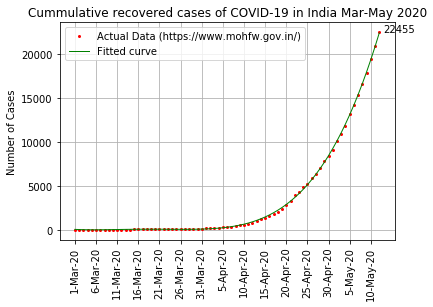

In [206]:
fit (days, cummulative_recovered)
my_plot(days, cummulative_recovered, dates, 5)
plt.title('Cummulative recovered cases of COVID-19 in India Mar-May 2020')
plt.show()

# 11. Analysis of daily new cases

Degree = 0 	MSE = 1284644.71 	 R^2 Score =   0.000000
Degree = 5 	MSE =   48568.52 	 R^2 Score =   0.962193
Degree = 10 	MSE =   39506.18 	 R^2 Score =   0.969247
Degree = 15 	MSE =   34136.00 	 R^2 Score =   0.973428
Degree = 20 	MSE =   29086.34 	 R^2 Score =   0.977358
Degree = 25 	MSE =   27969.46 	 R^2 Score =   0.978228
Degree = 30 	MSE =   27592.46 	 R^2 Score =   0.978521
Degree = 35 	MSE =   26429.81 	 R^2 Score =   0.979426
Degree = 40 	MSE =   26615.34 	 R^2 Score =   0.979282
Degree = 45 	MSE =   26057.30 	 R^2 Score =   0.979716
Degree = 50 	MSE =   26033.46 	 R^2 Score =   0.979735
Degree = 55 	MSE =   26059.46 	 R^2 Score =   0.979715
Degree = 60 	MSE =   25705.64 	 R^2 Score =   0.979990
Degree = 65 	MSE =   25509.06 	 R^2 Score =   0.980143
Degree = 70 	MSE =   25519.74 	 R^2 Score =   0.980135
Degree = 75 	MSE =   24931.99 	 R^2 Score =   0.980592
Degree = 80 	MSE =   23679.80 	 R^2 Score =   0.981567
Degree = 85 	MSE =   20368.74 	 R^2 Score =   0.984144
Degree = 90 

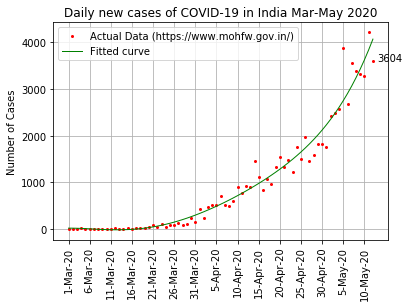

In [207]:
fit (days, daily_new_cases)
my_plot (days, daily_new_cases, dates, 5)
plt.title('Daily new cases of COVID-19 in India Mar-May 2020')
plt.show()

# 12. Analysis of daily new deaths

Degree = 0 	MSE =    1485.23 	 R^2 Score =   0.000000
Degree = 5 	MSE =     205.28 	 R^2 Score =   0.861787
Degree = 10 	MSE =     152.42 	 R^2 Score =   0.897379
Degree = 15 	MSE =     142.84 	 R^2 Score =   0.903829
Degree = 20 	MSE =     131.41 	 R^2 Score =   0.911522
Degree = 25 	MSE =     113.98 	 R^2 Score =   0.923258
Degree = 30 	MSE =     102.14 	 R^2 Score =   0.931230
Degree = 35 	MSE =      94.88 	 R^2 Score =   0.936120
Degree = 40 	MSE =      92.37 	 R^2 Score =   0.937809
Degree = 45 	MSE =      92.21 	 R^2 Score =   0.937916
Degree = 50 	MSE =      89.16 	 R^2 Score =   0.939972
Degree = 55 	MSE =      84.26 	 R^2 Score =   0.943270
Degree = 60 	MSE =      68.03 	 R^2 Score =   0.954194
Degree = 65 	MSE =      62.06 	 R^2 Score =   0.958218
Degree = 70 	MSE =      59.11 	 R^2 Score =   0.960204
Degree = 75 	MSE =      59.72 	 R^2 Score =   0.959791
Degree = 80 	MSE =      59.02 	 R^2 Score =   0.960265
Degree = 85 	MSE =      53.35 	 R^2 Score =   0.964077
Degree = 90 

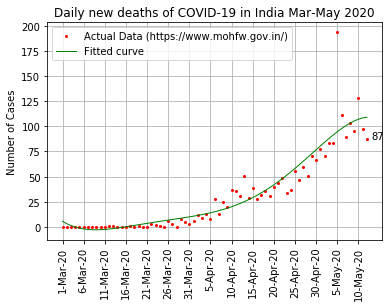

In [208]:
fit (days, daily_new_deaths)
my_plot (days, daily_new_deaths, dates, 5)
plt.title('Daily new deaths of COVID-19 in India Mar-May 2020')
plt.show()

# 13. Analysis of daily new recovered

Degree = 0 	MSE =  199285.69 	 R^2 Score =   0.000000
Degree = 5 	MSE =    6241.59 	 R^2 Score =   0.968680
Degree = 10 	MSE =    5899.23 	 R^2 Score =   0.970398
Degree = 15 	MSE =    5312.95 	 R^2 Score =   0.973340
Degree = 20 	MSE =    5251.31 	 R^2 Score =   0.973649
Degree = 25 	MSE =    5189.81 	 R^2 Score =   0.973958
Degree = 30 	MSE =    5062.85 	 R^2 Score =   0.974595
Degree = 35 	MSE =    4760.66 	 R^2 Score =   0.976111
Degree = 40 	MSE =    4797.29 	 R^2 Score =   0.975928
Degree = 45 	MSE =    4627.67 	 R^2 Score =   0.976779
Degree = 50 	MSE =    4591.53 	 R^2 Score =   0.976960
Degree = 55 	MSE =    4593.13 	 R^2 Score =   0.976952
Degree = 60 	MSE =    4522.11 	 R^2 Score =   0.977308
Degree = 65 	MSE =    4339.04 	 R^2 Score =   0.978227
Degree = 70 	MSE =    3910.63 	 R^2 Score =   0.980377
Degree = 75 	MSE =    3961.55 	 R^2 Score =   0.980121
Degree = 80 	MSE =    4015.42 	 R^2 Score =   0.979851
Degree = 85 	MSE =    3771.90 	 R^2 Score =   0.981073
Degree = 90 

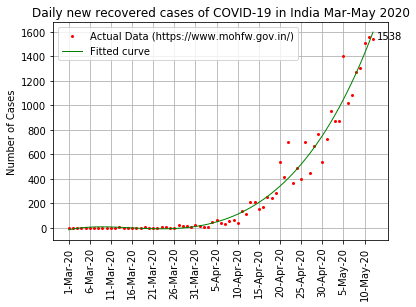

In [209]:
fit (days, daily_new_recovered)
my_plot (days, daily_new_recovered, dates, 5)
plt.title('Daily new recovered cases of COVID-19 in India Mar-May 2020')
plt.show()

# 14. Comparison of proportions of deaths and recovered cases

We can observe that Recovery rate has begun to increase since mid april. Death rate is still constant around 3 and slightly decreasing. These are good signs.

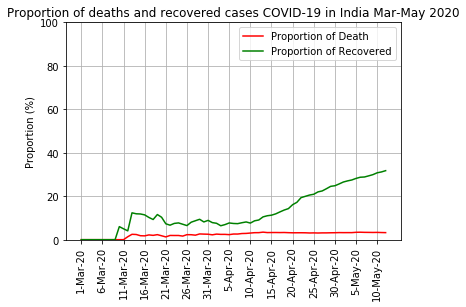

In [210]:
date_list = []
pos = []
for i in range(len(dates)):
  if i%5==0:
      date_list.append(str(dates[i]).split()[0])
      pos.append(i)

plt.plot(prop_death, 'r')
plt.plot(prop_recovered, 'g')
plt.legend(['Proportion of Death','Proportion of Recovered'])
plt.ylabel('Proportion (%)')
plt.grid(which='both',axis='both')
plt.ylim([0,100])
plt.title('Proportion of deaths and recovered cases COVID-19 in India Mar-May 2020')
plt.xticks(ticks=pos, rotation='vertical',labels=date_list)
plt.show()